In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import matplotlib.pyplot as plt
from CorrectFeatures import correct_US_data, correct_SCT_data, correct_SCT_labels, correct_US_labels

In [3]:
training_data_SCT = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_training.csv"), shuffle=False)
training_labels_SCT = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_training.csv"))

In [4]:
training_data_US = correct_US_data(pd.read_csv("Data/US/US_data_training.csv"), shuffle=False)
training_labels_US = correct_US_labels(pd.read_csv("Data/US/US_labels_training.csv"))

In [5]:
training_data_SCT.columns

Index(['attendance', 'establishment', 'staff_in_post', 'total_vacancies',
       'vacant_less_than_3_months', 'vacant_3_to_6_months',
       'vacant_6_months_or_more', 'nursing_home_1', 'nursing_home_10',
       'nursing_home_100',
       ...
       '60km_and_over_norm', 'other_2_norm', 'staff_in_post_norm',
       'total_vacancies_norm', 'vacant_less_than_3_months_norm',
       'vacant_3_to_6_months_norm', 'vacant_6_months_or_more_norm',
       'region_east', 'region_west', 'region_north'],
      dtype='object', length=513)

In [6]:
model_4_hours_loaded_SCT,\
model_8_hours_loaded_SCT,\
model_12_hours_loaded_SCT,\
model_long_hours_loaded_SCT = None, None, None, None
with open("Models/TrainingRandomForestScotlandModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    model_4_hours_loaded_SCT,\
    model_8_hours_loaded_SCT,\
    model_12_hours_loaded_SCT,\
    model_long_hours_loaded_SCT = pickle.loads(model_bytes)

172329131


In [7]:
loaded_model_US = None
with open("Models/TrainingRandomForestUSModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    loaded_model_US = pickle.loads(model_bytes)

21881928


Text(0.5, 1.0, 'Feature Importance for United States Model')

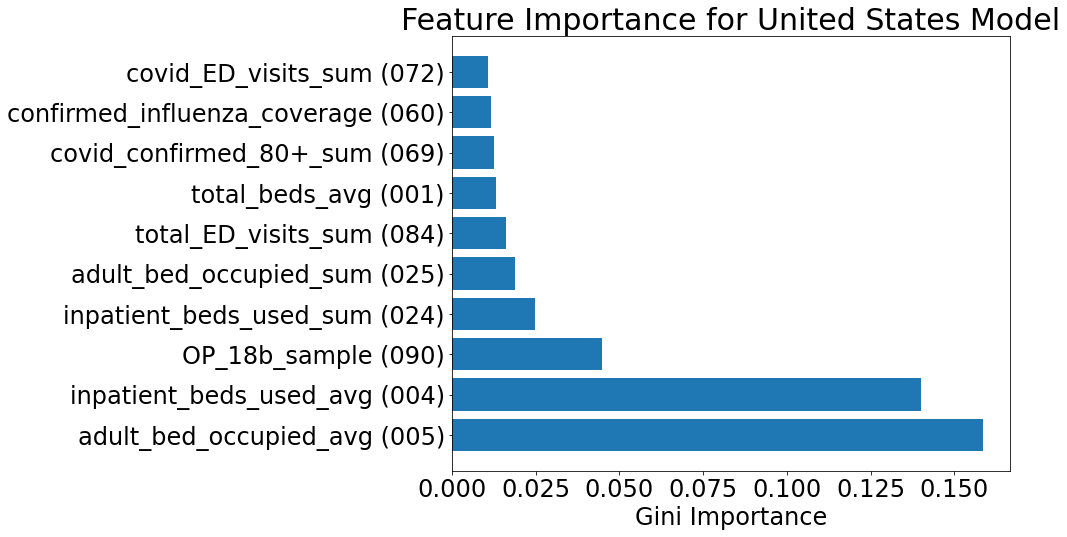

In [35]:
from textwrap import wrap
plt.rcParams.update({'font.size': 24})
def format_names(names):
    return ["%s (%03d)"%("\n".join(wrap(name,40)), idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    loaded_model_US.feature_importances_,
    format_names(training_data_US.columns)
))))[:10]))

names = (
    'adult_bed_occupied_avg (005)',
    'inpatient_beds_used_avg (004)',
    'OP_18b_sample (090)',
    'inpatient_beds_used_sum (024)',
    'adult_bed_occupied_sum (025)',
    'total_ED_visits_sum (084)',
    'total_beds_avg (001)',
    'covid_confirmed_80+_sum (069)',
    'confirmed_influenza_coverage (060)',
    'covid_ED_visits_sum (072)')

fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Gini Importance")
fig.set_size_inches(10, 8)
axs.set_title("Feature Importance for United States Model", fontsize=30)

Text(0.5, 0.98, 'Feature Importance for Scottish models')

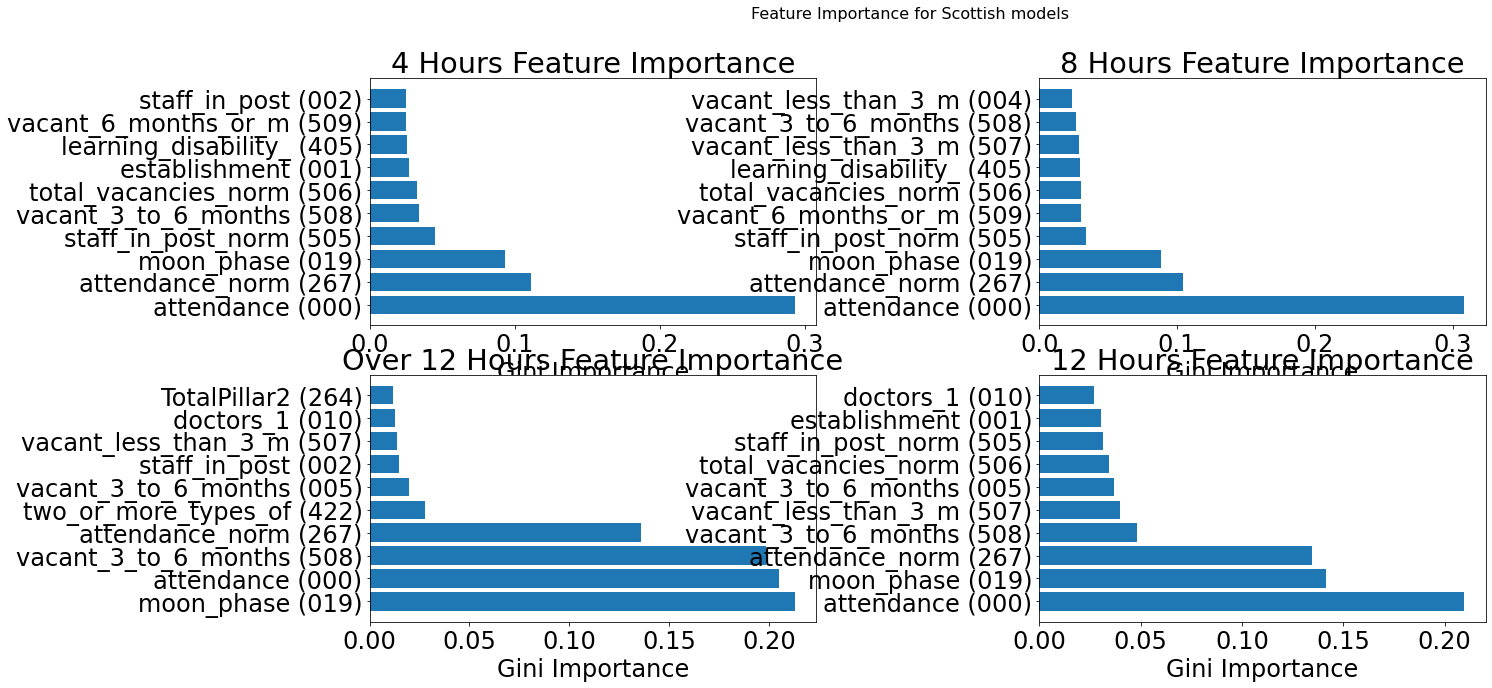

In [10]:
def format_names(names, length=20):
    return ["%s (%03d)"%(name[:length], idx)for idx, name in enumerate(names)]
fig, axs = plt.subplots(2, 2)


height, names= list(zip(*list(reversed(sorted(zip(
    model_4_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[0,0].barh(names, height)
axs[0,0].set_title("4 Hours Feature Importance")

height, names= list(zip(*list(reversed(sorted(zip(
    model_8_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[0,1].barh(names, height)
axs[0,1].set_title("8 Hours Feature Importance")


height, names= list(zip(*list(reversed(sorted(zip(
    model_12_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[1,1].barh(names, height)
axs[1,1].set_title("12 Hours Feature Importance")


height, names= list(zip(*list(reversed(sorted(zip(
    model_long_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[1,0].barh(names, height)
axs[1,0].set_title("Over 12 Hours Feature Importance")


for ar in axs:
    for a in ar:
        a.set_xlabel("Gini Importance")
plt.subplots_adjust(
    wspace=.5
)
fig.set_size_inches(20, 10)
fig.suptitle("Feature Importance for Scottish models", fontsize=16)

Text(0.5, 1.0, 'Feature Importance for Average Scottish Model')

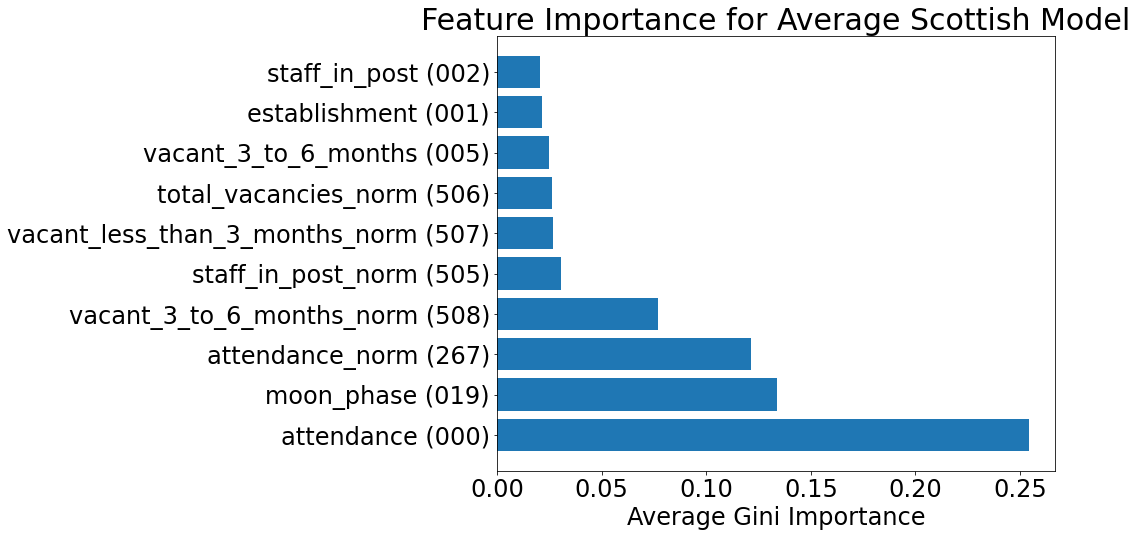

In [36]:
plt.rcParams.update({'font.size': 24})
def format_names(names):
    return ["%s (%03d)"%(name, idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    (model_4_hours_loaded_SCT.feature_importances_ +
     model_8_hours_loaded_SCT.feature_importances_ +
     model_12_hours_loaded_SCT.feature_importances_ +
     model_long_hours_loaded_SCT.feature_importances_)/4,
    format_names(training_data_SCT.columns)
))))[:10]))
fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Average Gini Importance")

fig.set_size_inches(10, 8)
axs.set_title("Feature Importance for Average Scottish Model", fontsize=30)

In [12]:
training_data_SCT.to_numpy().shape

(7214, 513)

In [13]:
model_4_hours_loaded_SCT.predict(training_data_SCT)

array([0.85033454, 0.80612641, 0.96976546, ..., 0.94267325, 0.9103765 ,
       0.9583941 ])

In [14]:
average_features_SCT = pd.DataFrame(data={
    "Features":training_data_SCT.columns,
    "Average Gini Importance":(model_4_hours_loaded_SCT.feature_importances_ +
                               model_8_hours_loaded_SCT.feature_importances_ +
                               model_12_hours_loaded_SCT.feature_importances_ +
                               model_long_hours_loaded_SCT.feature_importances_)/4})
average_features_SCT.index.name = "Index"

In [15]:
features_US = pd.DataFrame(data={
    "Features":training_data_US.columns,
    "Gini Importance":loaded_model_US.feature_importances_})
features_US.index.name = "Index"

In [16]:
average_features_SCT.head()

,Features,Average Gini Importance
Index,,
0,attendance,0.254045
1,establishment,0.021440
2,staff_in_post,0.020686
3,total_vacancies,0.011038
4,vacant_less_than_3_months,0.017183


In [17]:
features_US.head()

,Features,Gini Importance
Index,,
0,fips_code,0.006823
1,total_beds_7_day_avg,0.013236
2,all_adult_hospital_beds_7_day_avg,0.005466
3,all_adult_hospital_inpatient_beds_7_day_avg,0.005959
4,inpatient_beds_used_7_day_avg,0.140087


In [18]:
((model_4_hours_loaded_SCT.feature_importances_ +
                               model_8_hours_loaded_SCT.feature_importances_ +
                               model_12_hours_loaded_SCT.feature_importances_ +
                               model_long_hours_loaded_SCT.feature_importances_)/4).shape

(513,)

In [19]:
average_features_SCT.to_csv("average_features_SCT.csv")

In [20]:
features_US.to_csv("features_US.csv")